# null importance: feature selection

In [1]:
import pandas as pd
import numpy as np
import glob
import pickle as pkl
from models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def get_feature_importance(model):
    # return np.log1p(model.estimator.feature_importance(importance_type='gain', iteration=model.estimator.best_iteration))
    return model.estimator.feature_importance(importance_type='gain', iteration=model.estimator.best_iteration)

In [3]:
model_name = "lgb026_dart"

feature_importance_df = pd.DataFrame()
for i in range(6):
    part = pd.read_csv("./models/lgb026.csv")
    model = load_model("./models/{}_{}.pkl".format(model_name, i))

    part["fi"] = get_feature_importance(model)
    feature_importance_df = pd.concat([feature_importance_df, part], axis=0)

[info] load model : ./models/lgb026_dart_0.pkl
[info] load model : ./models/lgb026_dart_1.pkl
[info] load model : ./models/lgb026_dart_2.pkl
[info] load model : ./models/lgb026_dart_3.pkl
[info] load model : ./models/lgb026_dart_4.pkl
[info] load model : ./models/lgb026_dart_5.pkl


In [4]:
def load_lgb_if(model_name, nsplit, features_fn):
    feature_importance_df = pd.DataFrame()
    for i in range(nsplit):
        part = pd.read_csv(features_fn)
        model = load_model("./models/{}_{}.pkl".format(model_name, i))

        part["fi"] = get_feature_importance(model)
        feature_importance_df = pd.concat([feature_importance_df, part], axis=0)
    return feature_importance_df

In [5]:
nsplit = 6
features_fn = "./models/lgb026.csv"

fi024 = load_lgb_if("lgb026_dart", nsplit, features_fn)
fi024_null = load_lgb_if("lgb026_dart_null", nsplit, features_fn)

[info] load model : ./models/lgb026_dart_0.pkl
[info] load model : ./models/lgb026_dart_1.pkl
[info] load model : ./models/lgb026_dart_2.pkl
[info] load model : ./models/lgb026_dart_3.pkl
[info] load model : ./models/lgb026_dart_4.pkl
[info] load model : ./models/lgb026_dart_5.pkl
[info] load model : ./models/lgb026_dart_null_0.pkl
[info] load model : ./models/lgb026_dart_null_1.pkl
[info] load model : ./models/lgb026_dart_null_2.pkl
[info] load model : ./models/lgb026_dart_null_3.pkl
[info] load model : ./models/lgb026_dart_null_4.pkl
[info] load model : ./models/lgb026_dart_null_5.pkl


In [6]:
avg_fi_cmp = pd.DataFrame()
avg_fi_cmp["fi"] = fi024.groupby("feature_name").fi.mean()
avg_fi_cmp["fi_null"] = fi024_null.groupby("feature_name").fi.mean()
avg_fi_cmp["fi_complex"] = (avg_fi_cmp.fi + 1) / (avg_fi_cmp.fi_null + 1)

for col in avg_fi_cmp.columns:
    avg_fi_cmp[col] = np.log1p(avg_fi_cmp[col])

In [7]:
avg_fi_cmp.sort_values("fi_complex").tail(150).head(20)

,fi,fi_null,fi_complex
feature_name,,,
sum_2_lag2_monthly_pmax_abs,9.105808,0.0,9.105919
sum_3_lag9_monthly_merchant_avg_std_abs,9.126180,0.0,9.126289
sum_1_lag-2_monthly_merchant_pmax,9.127577,0.0,9.127686
newk_new_merchant_id_nunique_newk,9.138545,0.0,9.138653
sum_3_lag11_monthly_pmax_abs,9.144200,0.0,9.144307
month_lag_-7_hist_trans,9.150495,0.0,9.150601
ratio_1_lag-8_monthly_merchant_pmax,9.150541,0.0,9.150647
sum_3_lag4_monthly_merchant_avg_std_abs,9.153321,0.0,9.153427
sum_1_lag-9_monthly_merchant_pmax,9.155737,0.0,9.155843


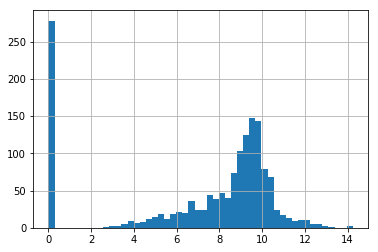

In [8]:
avg_fi_cmp.fi.hist(bins=50)

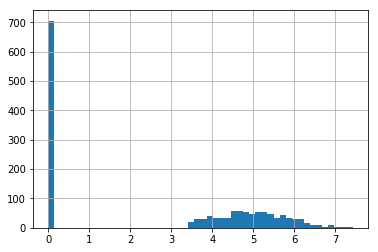

In [9]:
avg_fi_cmp.fi_null.hist(bins=50)

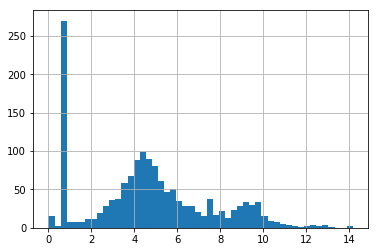

In [10]:
avg_fi_cmp.fi_complex.hist(bins=50)

In [11]:
avg_fi_cmp.to_csv("./models/lgb026.csv")

In [12]:
avg_fi_cmp[avg_fi_cmp.fi_complex > 8].shape

(234, 3)

In [13]:
avg_fi_cmp[avg_fi_cmp.fi_complex > 4.25].shape

(852, 3)

In [14]:
avg_fi_cmp.sort_values("fi_complex").tail(250)

,fi,fi_null,fi_complex
feature_name,,,
purchase_month_201711_hist_trans,7.759260,0.000000,7.759686
ratio_1_lag-10_monthly_merchant_avg_std,7.765667,0.000000,7.766091
category_2_classes_hist_trans,7.786769,0.000000,7.787184
ratio_2_lag-9_monthly_pmax,7.795195,0.000000,7.795607
ratio_4_lag1_monthly_psum,11.869725,4.060365,7.809766
sum_1_lag-12_monthly_pmax,7.822602,0.000000,7.823003
category_2_1.0_new_trans,7.843707,0.000000,7.844099
newk_elapsed_time_newk,7.899700,0.000000,7.900070
newk_new_card_id_count_newk,7.913244,0.000000,7.913610
